In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions
library(SDMTools)
library(gbm)
library(randomForest)

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loaded gbm 2.1.5

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




[1] "agriculture-loan-prediction"

In [2]:
#read in files
train=read.csv("../input/agriculture-loan-prediction/train_comp1_2020.csv",stringsAsFactors=FALSE)
test=read.csv("../input/agriculture-loan-prediction/test_comp1_2020.csv",stringsAsFactors=FALSE)

In [3]:
#Remove the nulls
#head(train$TYCornUnits[!is.numeric(train$TYCornUnits)])

train$TYCornUnits=abs(as.numeric(train$TYCornUnits))
train$TYCornUnits[is.na(train$TYCornUnits)]=median(train$TYCornUnits[!is.na(train$TYCornUnits)])
train$TYBeanUnits=as.numeric(train$TYBeanUnits)
train$TYBeanUnits[is.na(train$TYBeanUnits)]=median(train$TYBeanUnits[!is.na(train$TYBeanUnits)])
train$TYWheatUnits=as.numeric(train$TYWheatUnits)
train$TYWheatUnits[is.na(train$TYWheatUnits)]=median(train$TYWheatUnits[!is.na(train$TYWheatUnits)])
train$LYCornUnits=as.numeric(train$LYCornUnits)
train$LYCornUnits[is.na(train$LYCornUnits)]=median(train$LYCornUnits[!is.na(train$LYCornUnits)])
train$LYBeanUnits=as.numeric(train$LYBeanUnits)
train$LYBeanUnits[is.na(train$LYBeanUnits)]=median(train$LYBeanUnits[!is.na(train$LYBeanUnits)])
train$LYWheatUnits=as.numeric(train$LYWheatUnits)
train$LYWheatUnits[is.na(train$LYWheatUnits)]=median(train$LYWheatUnits[!is.na(train$LYWheatUnits)])
train$AT28=as.numeric(train$AT28)
train$AT28[is.na(train$AT28)]=median(train$AT28[!is.na(train$AT28)])
train$AT33=as.numeric(train$AT33)
train$AT33[is.na(train$AT33)]=median(train$AT33[!is.na(train$AT33)])
train$AT36=as.numeric(train$AT36)
train$AT36[is.na(train$AT36)]=median(train$AT36[!is.na(train$AT36)])
train$BC33=as.numeric(train$BC33)
train$BC33[is.na(train$BC33)]=median(train$AT36[!is.na(train$BC33)])
train$BC98=as.numeric(train$BC98)
train$BC98[is.na(train$BC98)]=median(train$BC98[!is.na(train$BC98)])
train$G068=as.numeric(train$G068)
train$G068[is.na(train$G068)]=median(train$G068[!is.na(train$G068)])
train$G091=as.numeric(train$G091)
train$G091[is.na(train$G091)]=median(train$G091[!is.na(train$G091)])
train$G093=as.numeric(train$G093)
train$G093[is.na(train$G093)]=median(train$G093[!is.na(train$G093)])
train$G094=as.numeric(train$G094)
train$G094[is.na(train$G094)]=median(train$G094[!is.na(train$G094)])
train$G096=as.numeric(train$G096)
train$G096[is.na(train$G096)]=median(train$G096[!is.na(train$G096)])
train$MT28=as.numeric(train$MT28)
train$MT28[is.na(train$MT28)]=median(train$MT28[!is.na(train$MT28)])
train$MT36=as.numeric(train$MT36)
train$MT36[is.na(train$MT36)]=median(train$MT36[!is.na(train$MT36)])
train$RE34=as.numeric(train$RE34)
train$RE34[is.na(train$RE34)]=median(train$RE34[!is.na(train$RE34)])
train$S063=as.numeric(train$S063)
train$S063[is.na(train$S063)]=median(train$S063[!is.na(train$S063)])

#train$TYCornUnits=log(abs(train$TYCornUnits+1))
#train$TYBeanUnits=log(abs(train$TYBeanUnits+1))
#train$TYWheatUnits=log(abs(train$TYWheatUnits+1))
#train$LYCornUnits=log(abs(train$LYCornUnits+1))
#train$LYBeanUnits=log(abs(train$LYBeanUnits+1))
#train$LYWheatUnits=log(abs(train$LYWheatUnits+1))
#train$AT28=log(abs(train$AT28+1))
#train$AT33=log(abs(train$AT33+1))
#train$AT36=log(abs(train$AT36+1))
#train$BC33=log(abs(train$BC33+1))
#train$BC98=log(abs(train$BC98+1))
#train$MT28=log(abs(train$MT28+1))
#train$MT36=log(abs(train$MT36+1))
#train$RE34=log(abs(train$RE34+1))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(e

In [4]:
#split train into train/test subsets
datum_train = sample( nrow(train) , as.integer(nrow(train)*.8) )
train_1 = train[datum_train,]
train_2 = train[-datum_train,]

head(train)

,CreditScore,TYCornUnits,TYBeanUnits,TYWheatUnits,LYCornUnits,LYBeanUnits,LYWheatUnits,State,Zip_Code,AT28,⋯,G091,G093,G094,G096,MT28,MT36,RE34,S063,PastDue,id
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,708,60,450,135,21,180,145,TN,38401,487831,⋯,0,0,0,3,120000,19,76.5,0,0,1
2,832,160,195,135,108,302,145,IL,61530,27000,⋯,0,0,0,0,0,19,1.8,0,0,2
3,791,687,1800,135,535,1275,145,IA,50158,25300,⋯,0,0,0,5,0,19,9.6,0,0,3
4,630,160,495,135,108,450,145,IL,62830,271088,⋯,0,0,0,10,0,19,9.6,0,0,4
5,828,160,495,135,108,450,145,IN,47906,7373727,⋯,0,0,0,6,6451500,19,68.9,0,0,5
6,810,160,540,270,124,630,225,IN,46725,210095,⋯,0,0,0,0,142759,19,13.9,0,0,6


In [5]:
#GLM
model_glm = glm(PastDue~CreditScore+TYCornUnits+TYBeanUnits+TYWheatUnits+LYCornUnits+LYBeanUnits+LYWheatUnits,
         data=train_1,family="binomial")

pred_train_2 = predict(model_glm,train_2,type="response")
pred_train_2 = round(pred_train_2)
mean(pred_train_2)

head(pred_train_2)

accuracy(train_2$PastDue,pred_train_2)

[1] 0.0002009646

4  8 29 60 62 64 
 0  0  0  0  0  0

threshold,AUC,omission.rate,sensitivity,specificity,prop.correct,Kappa
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5,0.5005496,0.9987437,0.001256281,0.999843,0.9599076,0.002100921


In [6]:
#GBM
model_gbm = gbm(PastDue~CreditScore+TYCornUnits+TYBeanUnits+TYWheatUnits+LYCornUnits+LYBeanUnits+LYWheatUnits,
         data=train_1,n.trees=500,interaction.depth=6)

Distribution not specified, assuming bernoulli ...


In [7]:
pred_train_2 = plogis(predict(model_gbm,train_2,n.trees=500))

mean(pred_train_2)

head(pred_train_2)

accuracy(train_2$PastDue,pred_train_2)

[1] 0.03941475

[1] 0.15479103 0.03545737 0.01694682 0.01075809 0.07469048 0.01514936

threshold,AUC,omission.rate,sensitivity,specificity,prop.correct,Kappa
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5,0.5505392,0.8982412,0.1017588,0.9993197,0.9634244,0.1750535


In [8]:
#Estimate using rf on the train_1 and evaluate on train_2
#RF Model

train_1$PastDue = factor(train_1$PastDue)

model_rf = randomForest(PastDue~CreditScore+TYCornUnits+TYBeanUnits+TYWheatUnits+LYCornUnits+LYBeanUnits+LYWheatUnits,
         data=train_1,family="binomial",importance=TRUE)

pred_train_2 = predict(model_rf,train_2,type="response")

head(pred_train_2)

accuracy(train_2$PastDue,pred_train_2)

4  8 29 60 62 64 
 0  0  0  0  0  0 
Levels: 0 1

Warning message in Ops.factor(bin.pred, threshold):
“‘>=’ not meaningful for factors”
Warning message in Ops.factor(bin.pred, threshold):
“‘<’ not meaningful for factors”


threshold,AUC,omission.rate,sensitivity,specificity,prop.correct,Kappa
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.5,0.701895,0.5954774,0.4045226,0.9992673,0.9754823,0.5584212


In [9]:
test$TYCornUnits=abs(as.numeric(test$TYCornUnits))
test$TYCornUnits[is.na(test$TYCornUnits)]=median(train$TYCornUnits)
test$TYBeanUnits=as.numeric(test$TYBeanUnits)
test$TYBeanUnits[is.na(test$TYBeanUnits)]=median(train$TYBeanUnits)
test$TYWheatUnits=as.numeric(test$TYWheatUnits)
test$TYWheatUnits[is.na(test$TYWheatUnits)]=median(train$TYWheatUnits)
test$LYCornUnits=as.numeric(test$LYCornUnits)
test$LYCornUnits[is.na(test$LYCornUnits)]=median(train$LYCornUnits)
test$LYBeanUnits=as.numeric(test$LYBeanUnits)
test$LYBeanUnits[is.na(test$LYBeanUnits)]=median(train$LYBeanUnits)
test$LYWheatUnits=as.numeric(test$LYWheatUnits)
test$LYWheatUnits[is.na(test$LYWheatUnits)]=median(train$LYWheatUnits)
test$AT28=as.numeric(test$AT28)
test$AT28[is.na(test$AT28)]=median(train$AT28)
test$AT33=as.numeric(test$AT33)
test$AT33[is.na(test$AT33)]=median(train$AT33)
test$AT36=as.numeric(test$AT36)
test$AT36[is.na(test$AT36)]=median(train$AT36)
test$BC33=as.numeric(test$BC33)
test$BC33[is.na(test$BC33)]=median(train$BC33)
test$BC98=as.numeric(test$BC98)
test$BC98[is.na(test$BC98)]=median(train$BC98)
test$G068=as.numeric(test$G068)
test$G068[is.na(test$G068)]=median(train$G068)
test$G091=as.numeric(test$G091)
test$G091[is.na(test$G091)]=median(train$G091)
test$G093=as.numeric(test$G093)
test$G093[is.na(test$G093)]=median(train$G093)
test$G094=as.numeric(test$G094)
test$G094[is.na(test$G094)]=median(train$G094)
test$G096=as.numeric(test$G096)
test$G096[is.na(test$G096)]=median(train$G096)
test$MT28=as.numeric(test$MT28)
test$MT28[is.na(test$MT28)]=median(train$MT28)
test$MT36=as.numeric(test$MT36)
test$MT36[is.na(test$MT36)]=median(train$MT36)
test$RE34=as.numeric(test$RE34)
test$RE34[is.na(test$RE34)]=median(train$RE34)
test$S063=as.numeric(test$S063)
test$S063[is.na(test$S063)]=median(train$S063)


#test$TYCornUnits=log(abs(test$TYCornUnits+.01))
#test$TYBeanUnits=log(abs(test$TYBeanUnits+.01))
#test$TYWheatUnits=log(abs(test$TYWheatUnits+.01))
#test$LYCornUnits=log(abs(test$LYCornUnits+.01))
#test$LYBeanUnits=log(abs(test$LYBeanUnits+.01))
#test$LYWheatUnits=log(abs(test$LYWheatUnits+.01))
#test$AT28=log(abs(test$AT28+.01))
#test$AT33=log(abs(test$AT33+.01))
#test$AT36=log(abs(test$AT36+.01))
#test$BC33=log(abs(test$BC33+.01))
#test$BC98=log(abs(test$BC98+.01))
#test$MT28=log(abs(test$MT28+.01))
#test$MT36=log(abs(test$MT36+.01))
#test$RE34=log(abs(test$RE34+.01))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(e

In [10]:
#test$PastDue = predict(model_glm,test,type="response")

test$PastDue = predict(model_rf,test,type="response")
write.csv(test[,c("id","PastDue")],"submission.csv",row.names=F)

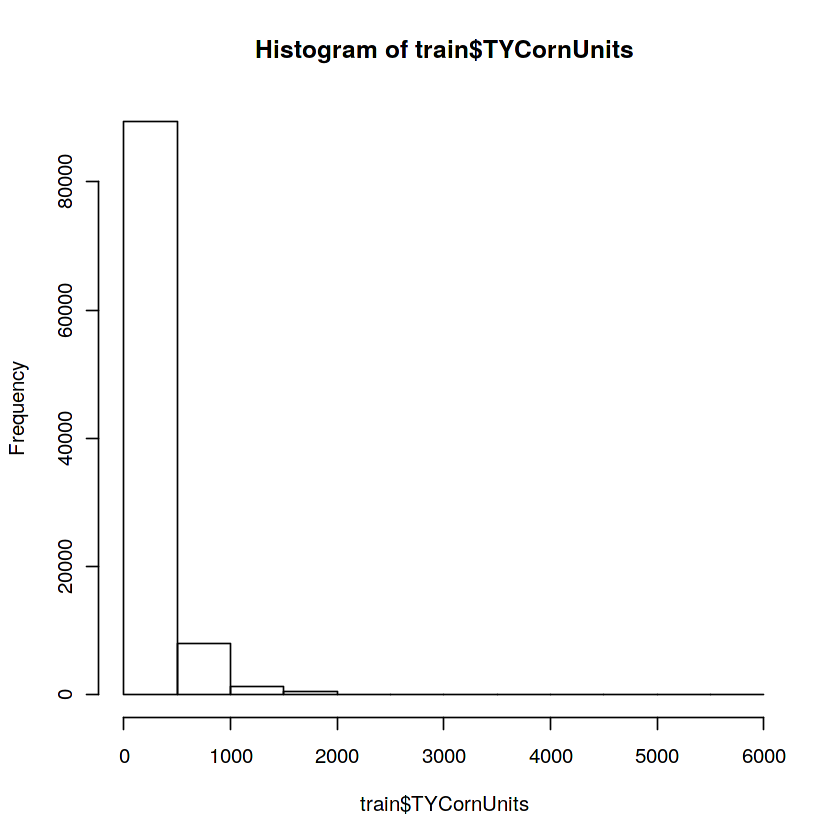

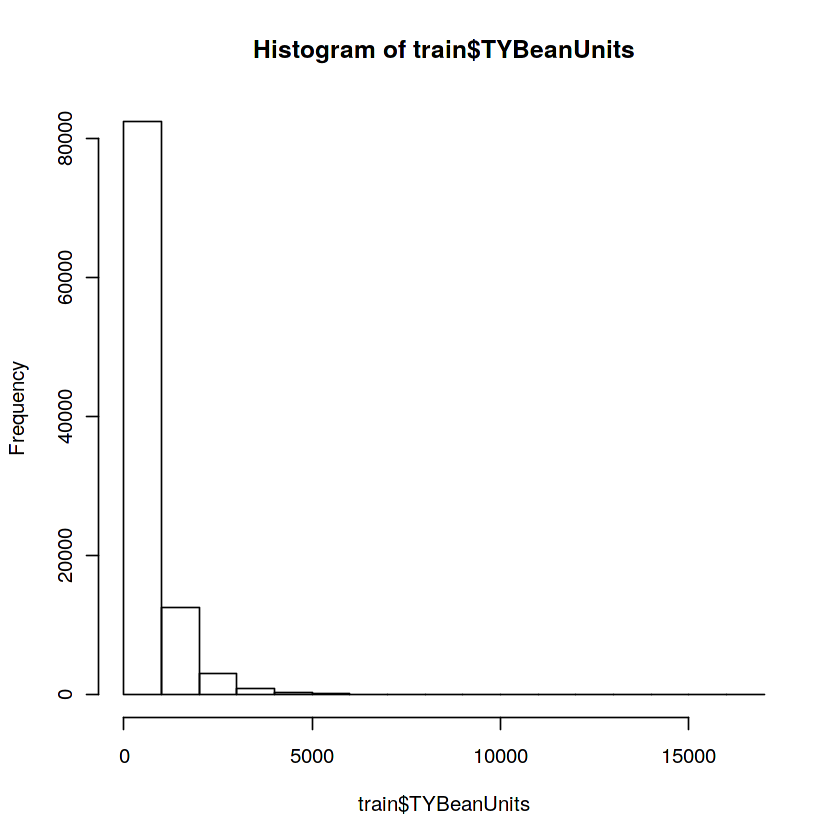

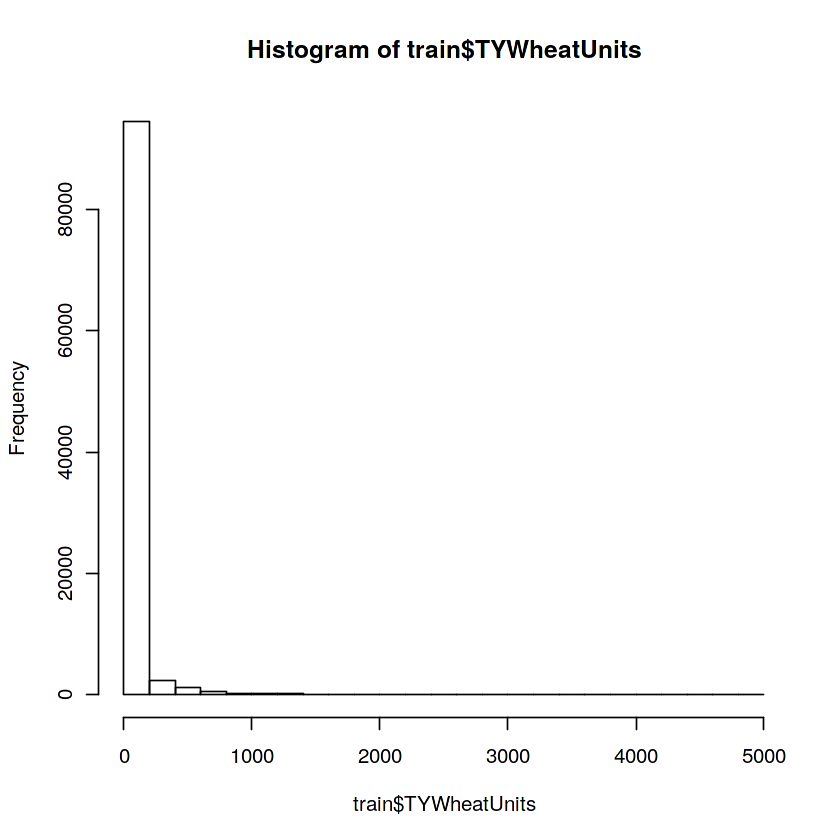

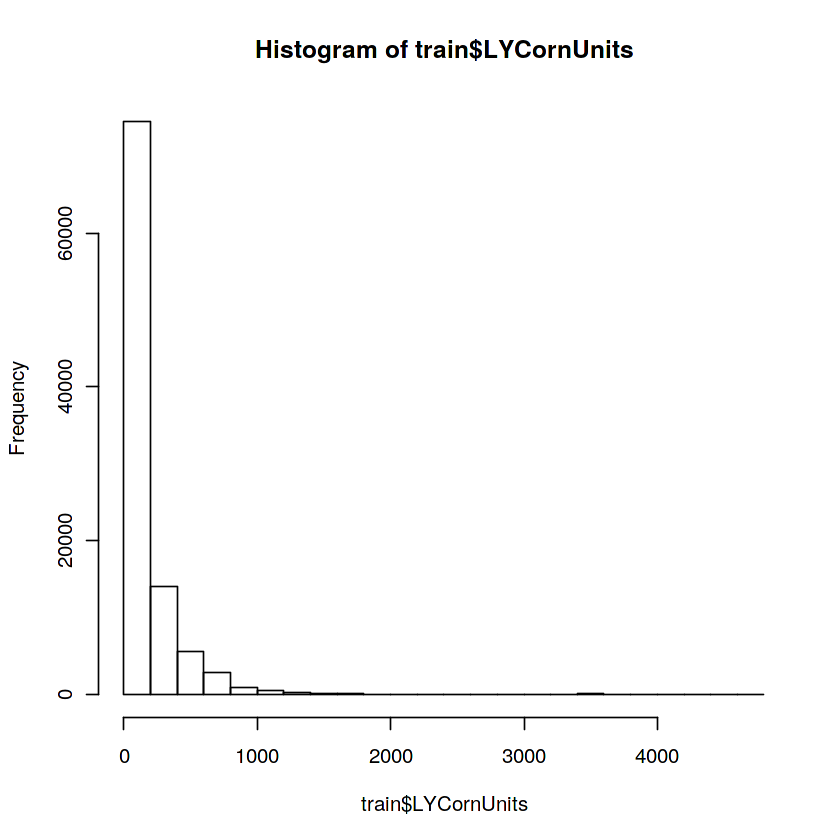

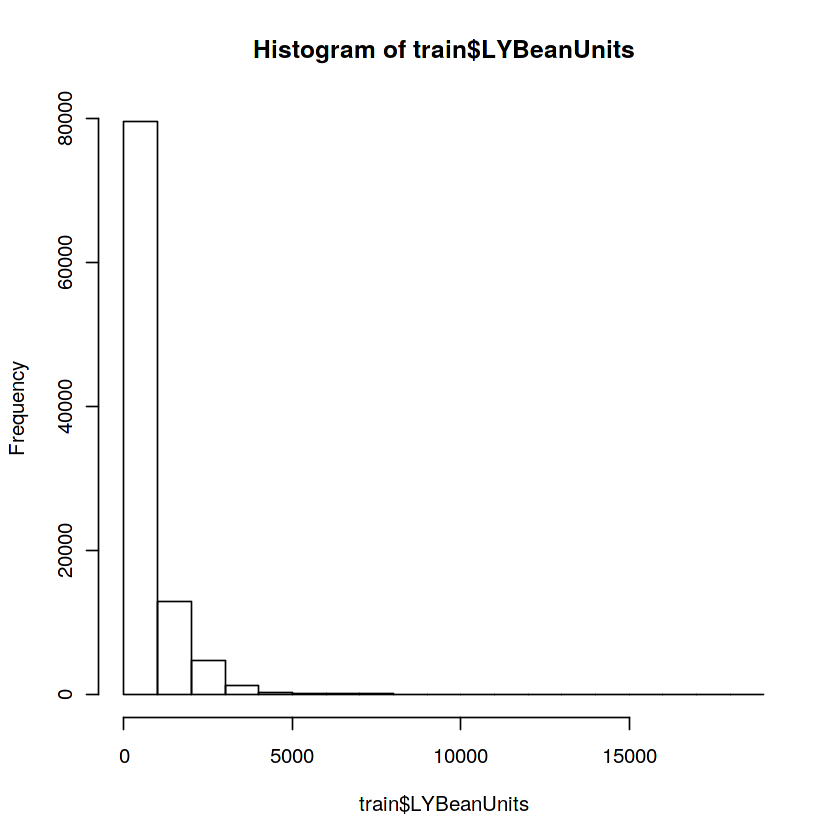

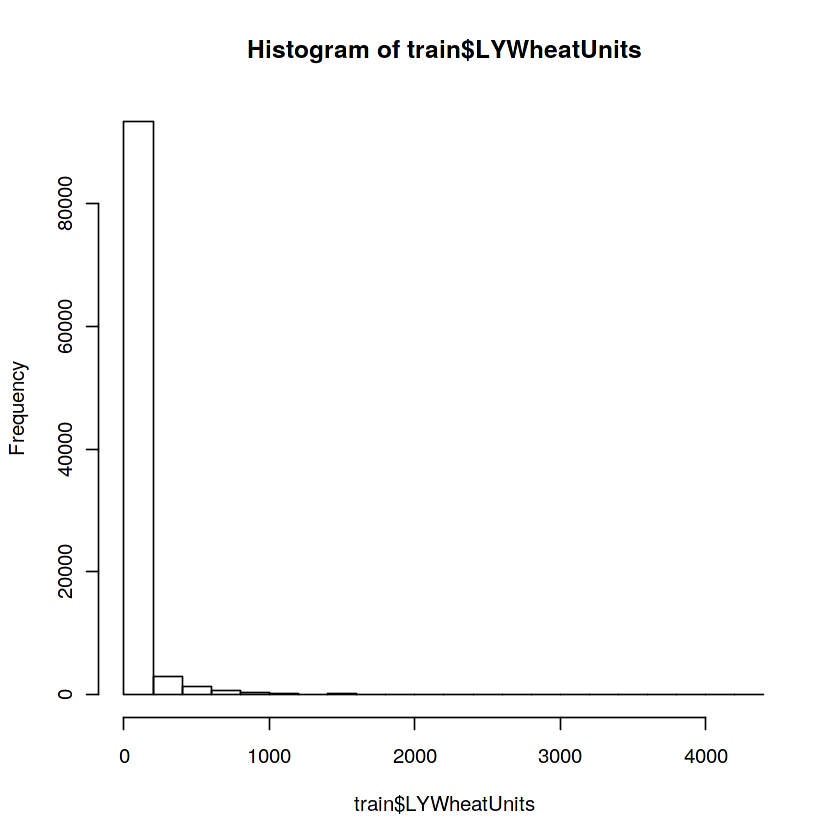

In [11]:
hist(train$TYCornUnits)
hist(train$TYBeanUnits)
hist(train$TYWheatUnits)
hist(train$LYCornUnits)
hist(train$LYBeanUnits)
hist(train$LYWheatUnits)

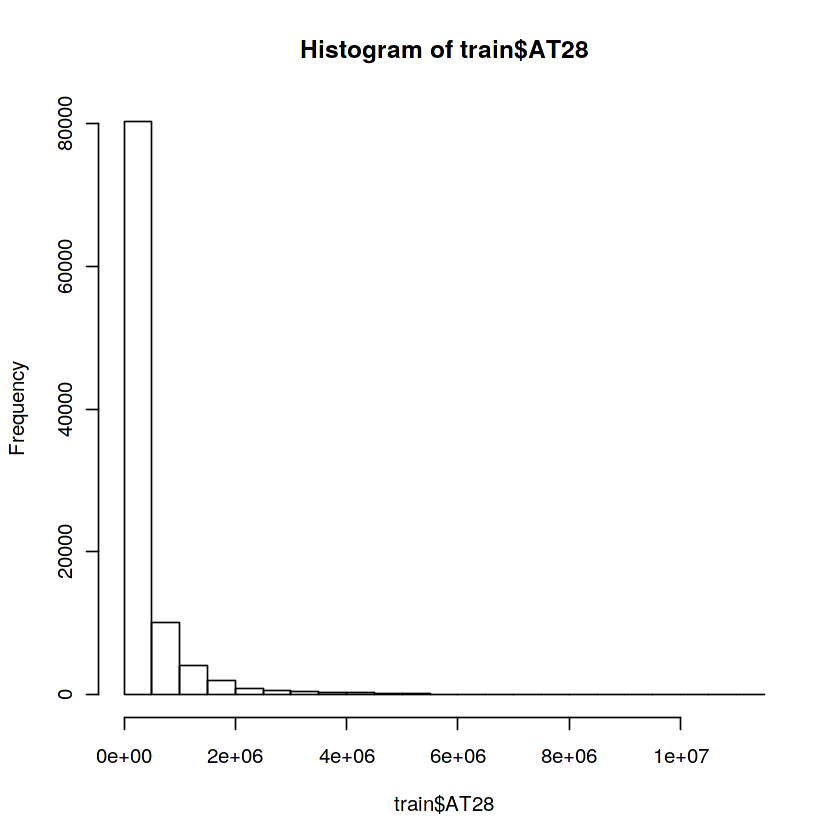

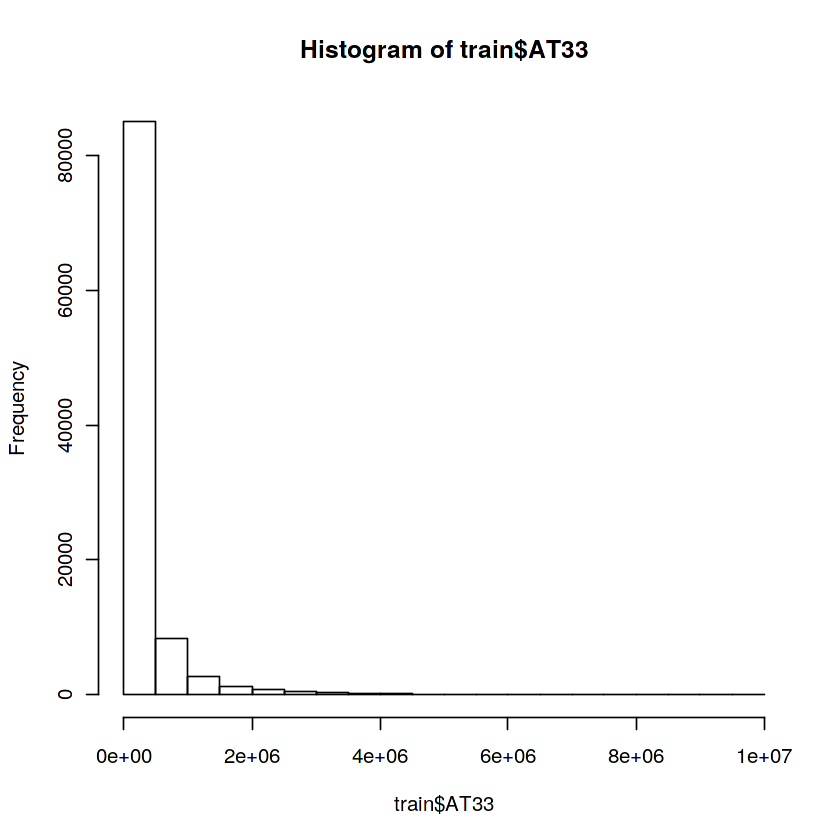

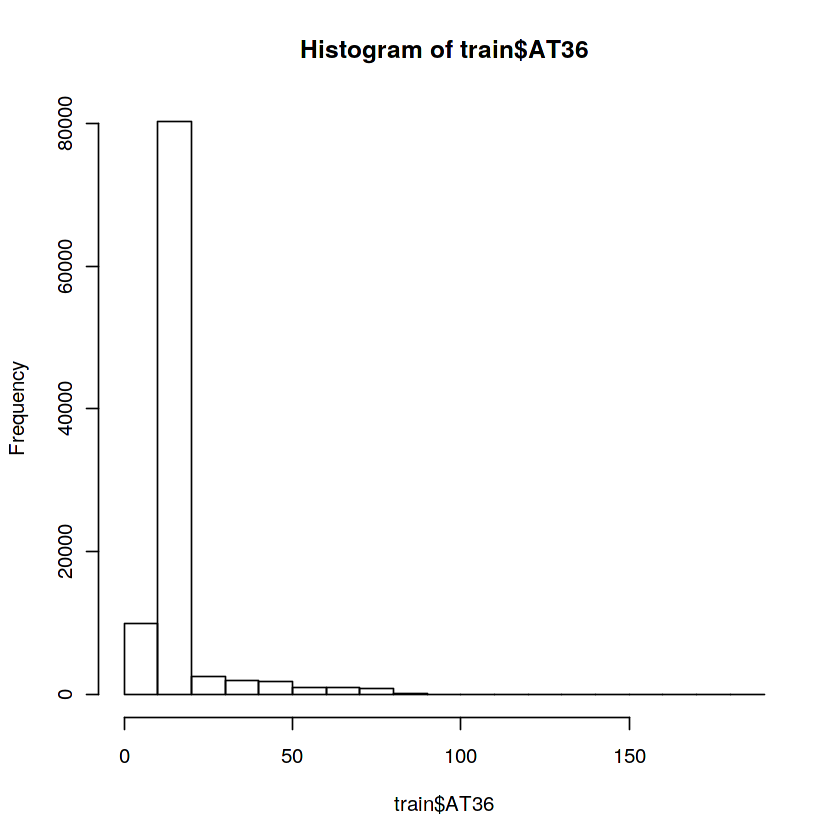

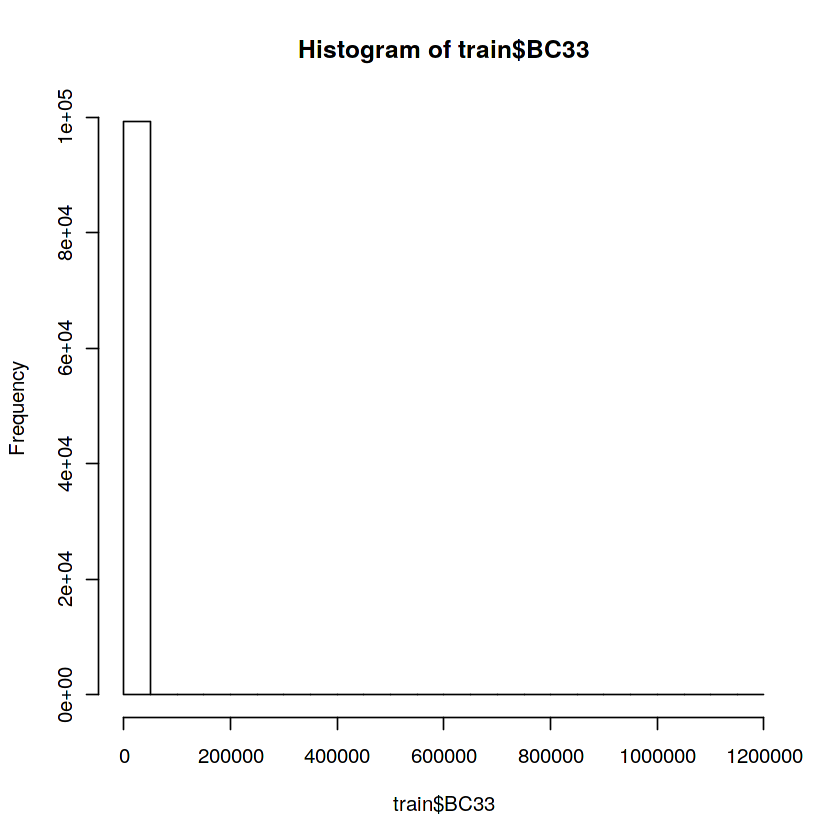

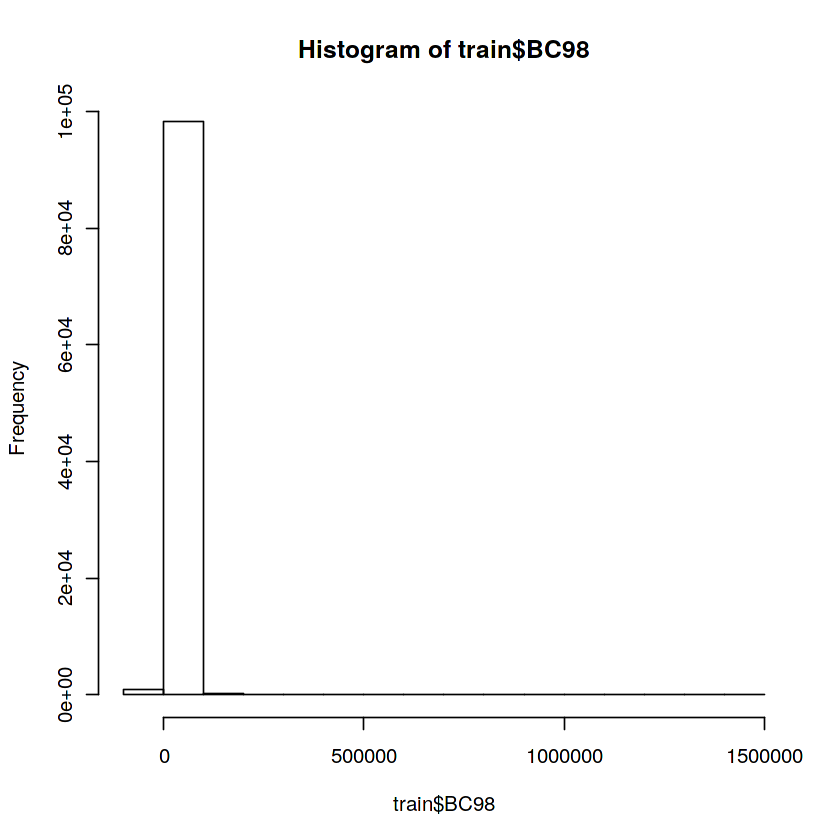

In [12]:
hist(train$AT28)
hist(train$AT33)
hist(train$AT36)
hist(train$BC33)
hist(train$BC98)

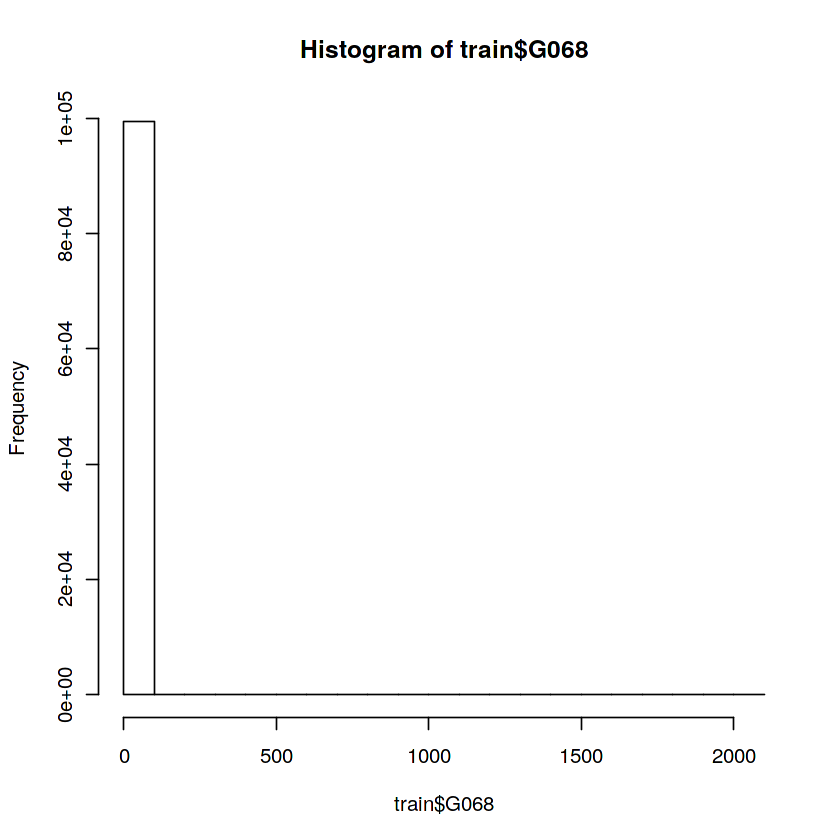

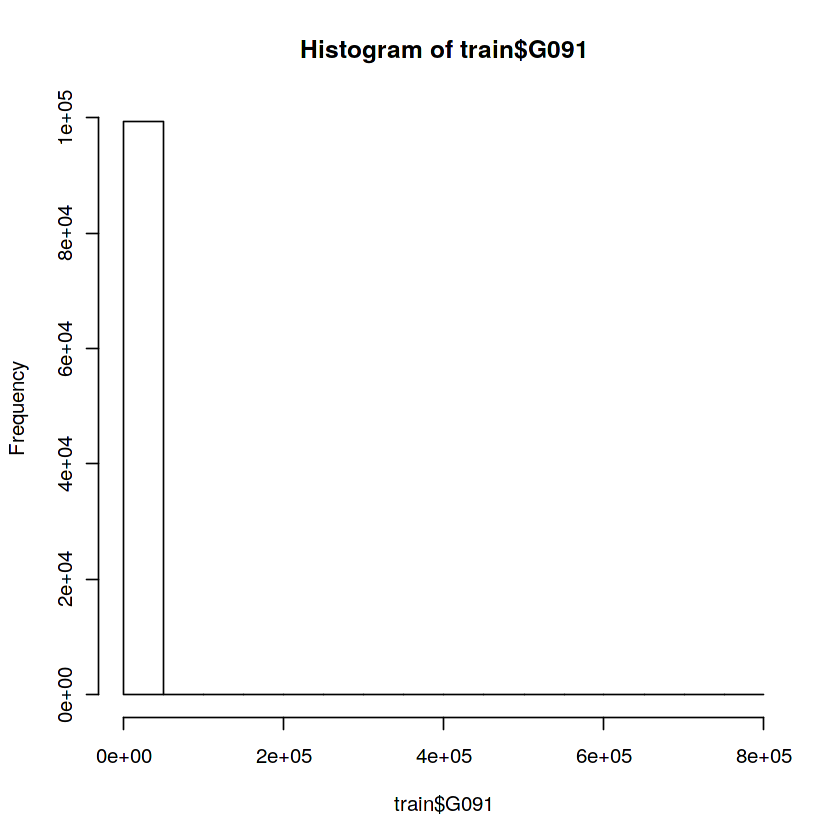

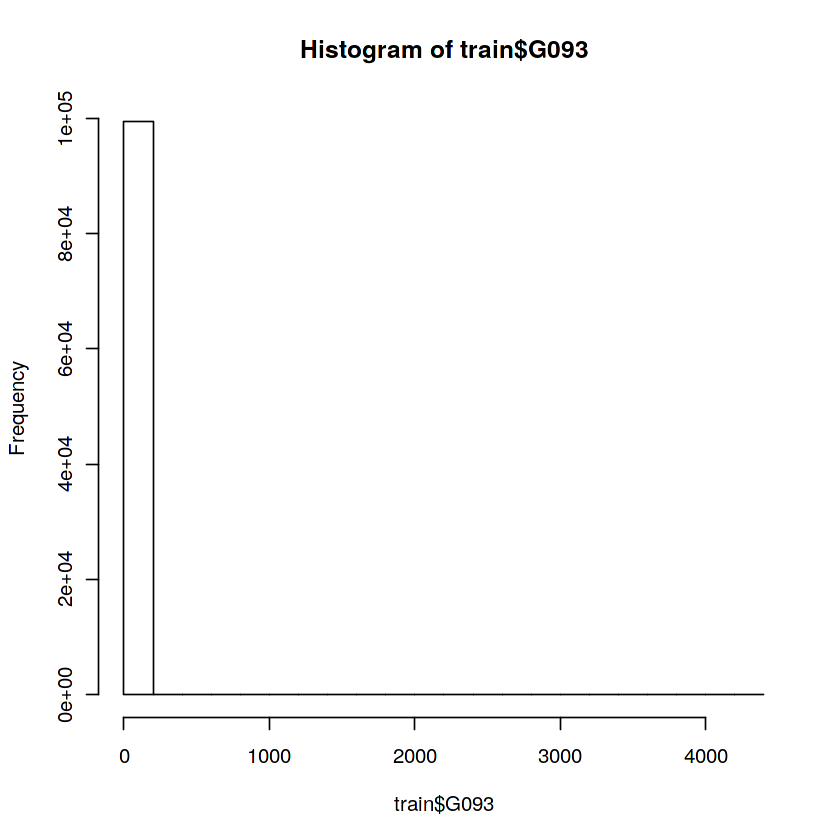

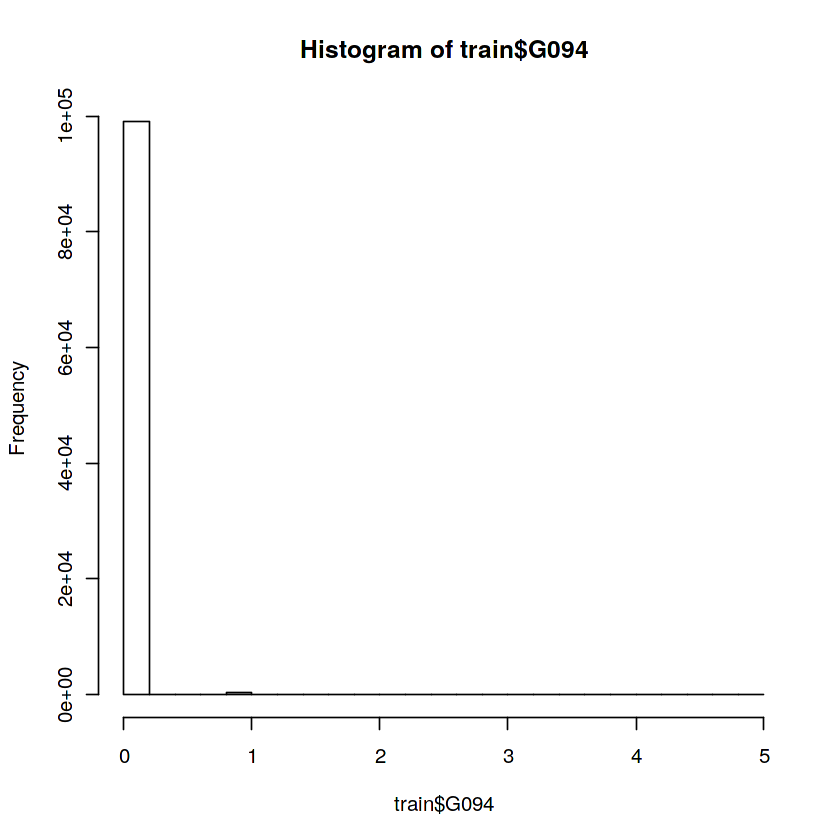

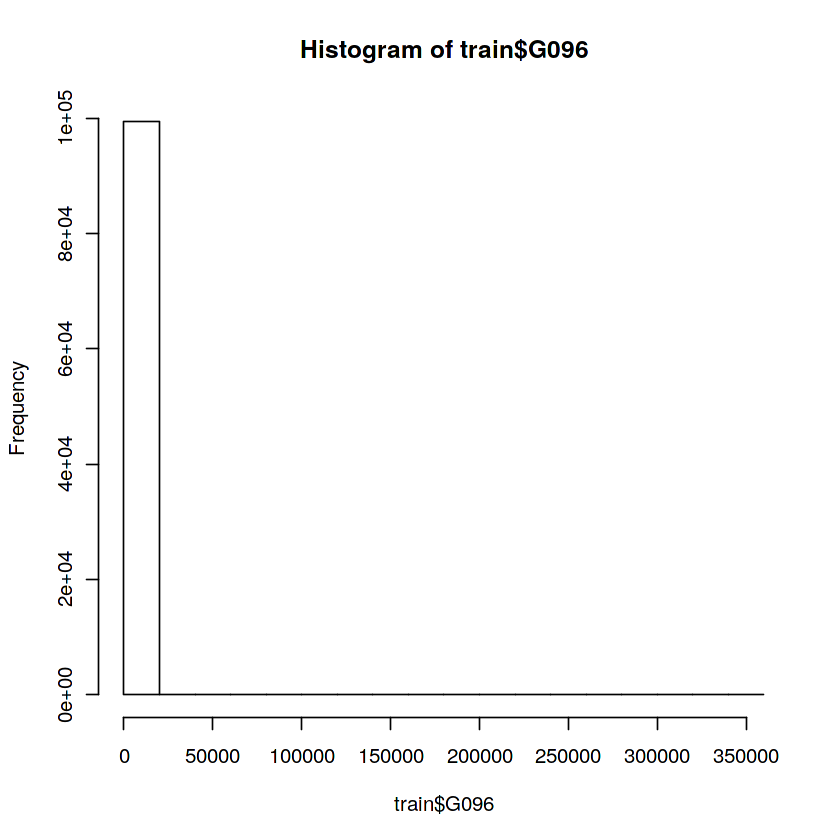

In [13]:
hist(train$G068)
hist(train$G091)
hist(train$G093)
hist(train$G094)
hist(train$G096)

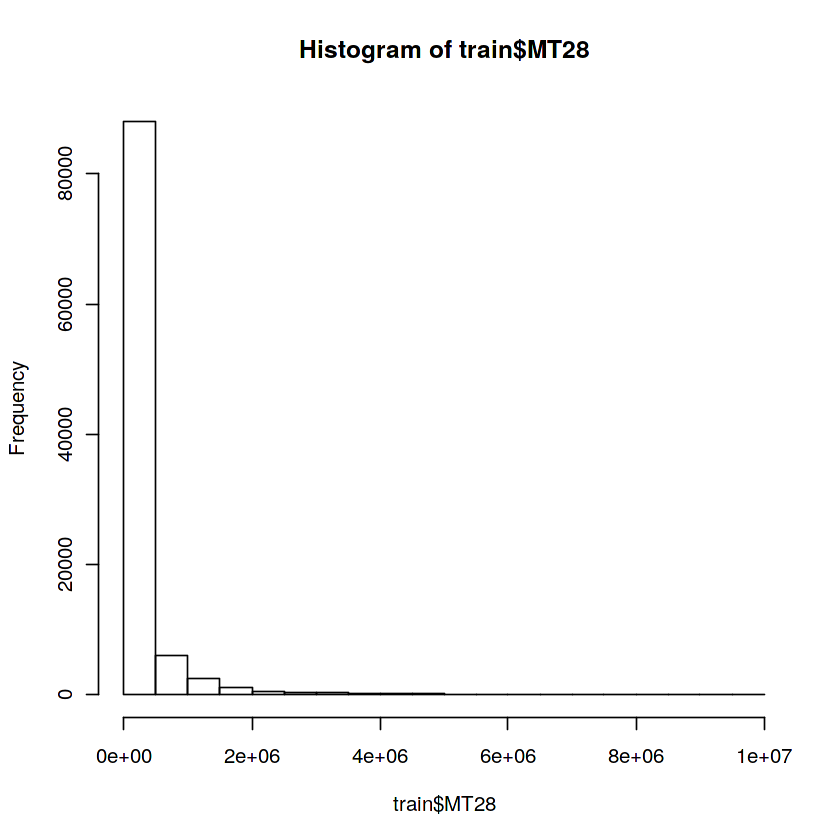

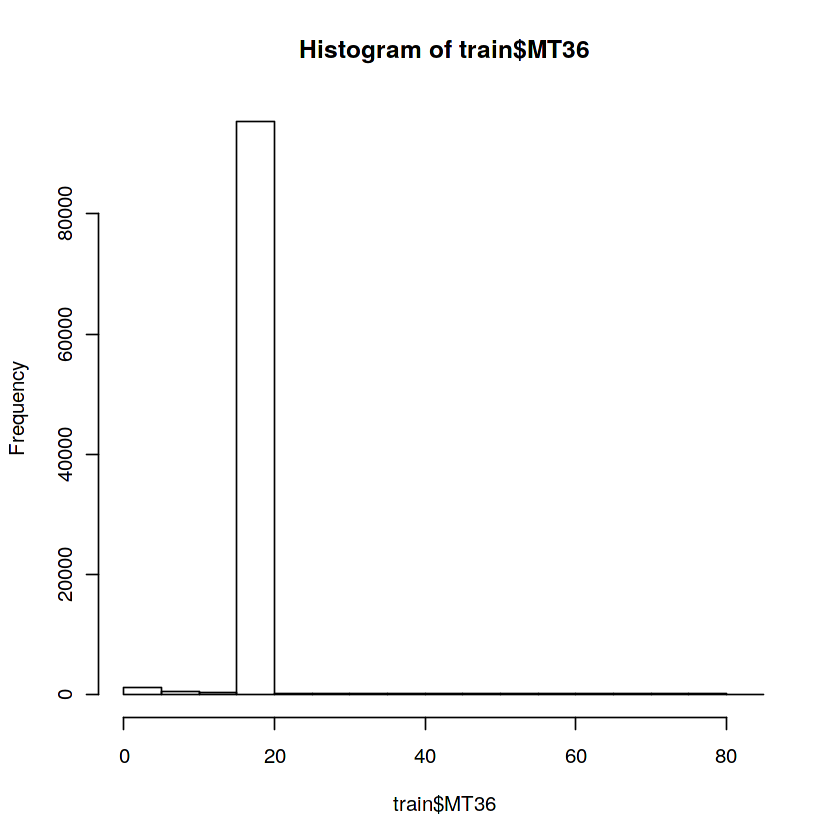

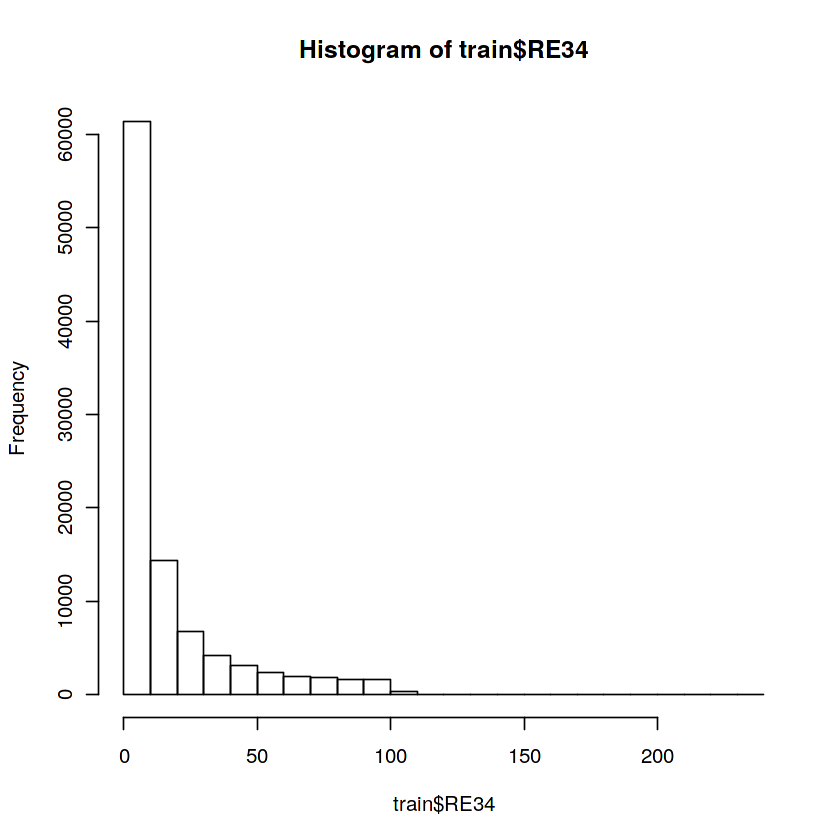

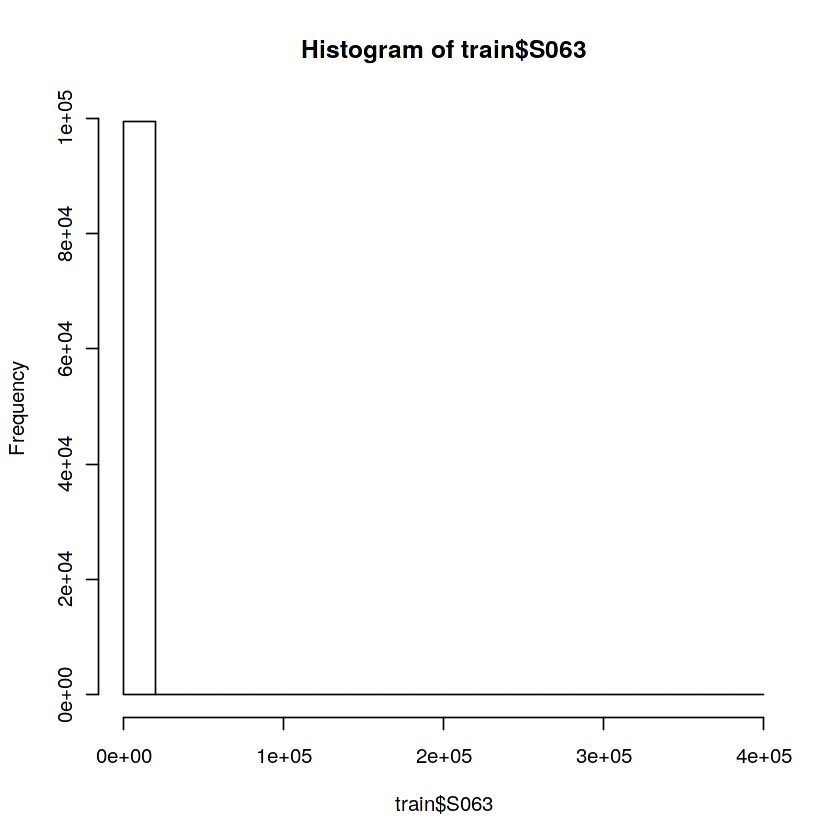

In [14]:
hist(train$MT28)
hist(train$MT36)
hist(train$RE34)
hist(train$S063)